In [6]:
import pandas as pd
import requests

url = "https://dummyjson.com/users?limit=100"

response = requests.get(url)
data = response.json()

df = pd.DataFrame(data['users'])

df.head()


,id,firstName,lastName,maidenName,age,gender,email,phone,username,password,...,address,macAddress,university,bank,company,ein,ssn,userAgent,crypto,role
0,1,Emily,Johnson,Smith,29,female,emily.johnson@x.dummyjson.com,+81 965-431-3024,emilys,emilyspass,...,"{'address': '626 Main Street', 'city': 'Phoeni...",47:fa:41:18:ec:eb,University of Wisconsin--Madison,"{'cardExpire': '05/28', 'cardNumber': '3693233...","{'department': 'Engineering', 'name': 'Dooley,...",977-175,900-590-289,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,"{'coin': 'Bitcoin', 'wallet': '0xb9fc2fe63b2a6...",admin
1,2,Michael,Williams,,36,male,michael.williams@x.dummyjson.com,+49 258-627-6644,michaelw,michaelwpass,...,"{'address': '385 Fifth Street', 'city': 'Houst...",79:15:78:99:60:aa,Ohio State University,"{'cardExpire': '01/30', 'cardNumber': '3530633...","{'department': 'Support', 'name': 'Spinka - Di...",912-602,108-953-962,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,"{'coin': 'Bitcoin', 'wallet': '0xb9fc2fe63b2a6...",admin
2,3,Sophia,Brown,,43,female,sophia.brown@x.dummyjson.com,+81 210-652-2785,sophiab,sophiabpass,...,"{'address': '1642 Ninth Street', 'city': 'Wash...",12:a3:d3:6f:5c:5b,Pepperdine University,"{'cardExpire': '10/27', 'cardNumber': '6011212...","{'department': 'Research and Development', 'na...",963-113,638-461-822,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,"{'coin': 'Bitcoin', 'wallet': '0xb9fc2fe63b2a6...",admin
3,4,James,Davis,,46,male,james.davis@x.dummyjson.com,+49 614-958-9364,jamesd,jamesdpass,...,"{'address': '238 Jefferson Street', 'city': 'S...",10:7d:df:1f:97:58,University of Southern California,"{'cardExpire': '07/30', 'cardNumber': '5303440...","{'department': 'Support', 'name': 'Pagac and S...",904-810,116-951-314,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,"{'coin': 'Bitcoin', 'wallet': '0xb9fc2fe63b2a6...",admin
4,5,Emma,Miller,Johnson,31,female,emma.miller@x.dummyjson.com,+91 759-776-1614,emmaj,emmajpass,...,"{'address': '607 Fourth Street', 'city': 'Jack...",32:b9:7e:8d:f5:e8,Northeastern University,"{'cardExpire': '07/30', 'cardNumber': '5237188...","{'department': 'Human Resources', 'name': 'Gra...",403-505,526-210-885,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:9...,"{'coin': 'Bitcoin', 'wallet': '0xb9fc2fe63b2a6...",admin


In [11]:
df.shape


(100, 28)

In [10]:
df.columns

Index(['id', 'firstName', 'lastName', 'maidenName', 'age', 'gender', 'email',
       'phone', 'username', 'password', 'birthDate', 'image', 'bloodGroup',
       'height', 'weight', 'eyeColor', 'hair', 'ip', 'address', 'macAddress',
       'university', 'bank', 'company', 'ein', 'ssn', 'userAgent', 'crypto',
       'role'],
      dtype='object')

In [12]:
df.dtypes

id              int64
firstName      object
lastName       object
maidenName     object
age             int64
gender         object
email          object
phone          object
username       object
password       object
birthDate      object
image          object
bloodGroup     object
height        float64
weight        float64
eyeColor       object
hair           object
ip             object
address        object
macAddress     object
university     object
bank           object
company        object
ein            object
ssn            object
userAgent      object
crypto         object
role           object
dtype: object

In [17]:
df.isnull().sum()

id            0
firstName     0
lastName      0
maidenName    0
age           0
gender        0
email         0
phone         0
username      0
password      0
birthDate     0
image         0
bloodGroup    0
height        0
weight        0
eyeColor      0
hair          0
ip            0
address       0
macAddress    0
university    0
bank          0
company       0
ein           0
ssn           0
userAgent     0
crypto        0
role          0
dtype: int64

In [18]:
df['id'].duplicated().sum()


0

In [19]:
df.describe()


,id,age,height,weight
count,100.000000,100.000000,100.000000,100.0000
mean,50.500000,31.700000,176.392500,75.0431
std,29.011492,4.132893,13.838342,14.0146
min,1.000000,23.000000,150.250000,50.1000
25%,25.750000,28.750000,166.700000,63.0075
50%,50.500000,31.000000,178.320000,75.4600
75%,75.250000,34.000000,187.617500,87.5175
max,100.000000,46.000000,199.620000,98.7700


In [20]:
df['gender'].value_counts()
df['bloodGroup'].value_counts()
df['eyeColor'].value_counts()
df['role'].value_counts()


role
user         85
moderator    10
admin         5
Name: count, dtype: int64

In [22]:
df['city'] = df['address'].apply(lambda x: x['city'])
df['country'] = df['address'].apply(lambda x: x['country'])
df[['city','country']].head()


,city,country
0,Phoenix,United States
1,Houston,United States
2,Washington,United States
3,Seattle,United States
4,Jacksonville,United States


In [24]:
#not needed in case of this data but i just did it
df['age'].fillna(df['age'].mean(), inplace=True)
df['height'].fillna(df['height'].mean(), inplace=True)
df['weight'].fillna(df['weight'].mean(), inplace=True)


Some Analytical Questions

In [25]:
df['age'].mean()


31.7

In [26]:
df.groupby('gender')['age'].mean()


gender
female    29.730769
male      33.833333
Name: age, dtype: float64

In [27]:

df['gender'].value_counts()


gender
female    52
male      48
Name: count, dtype: int64

In [28]:
df['city'].value_counts().head(10)


city
Phoenix         9
Jacksonville    8
Dallas          8
Columbus        8
San Diego       6
Chicago         6
Seattle         5
San Antonio     5
New York        5
Denver          5
Name: count, dtype: int64

In [29]:
df[['height','weight']].mean()


height    176.3925
weight     75.0431
dtype: float64

In [30]:
df[['age','height','weight']].corr()


,age,height,weight
age,1.000000,-0.102179,-0.075667
height,-0.102179,1.000000,-0.124662
weight,-0.075667,-0.124662,1.000000


In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


F:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


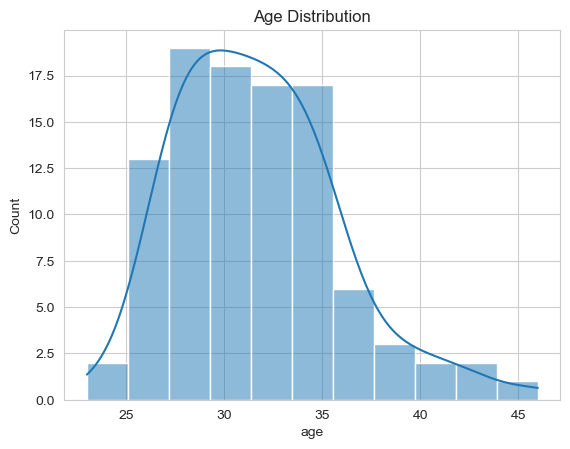

In [32]:
sns.histplot(df['age'], kde=True)
plt.title("Age Distribution")
plt.show()


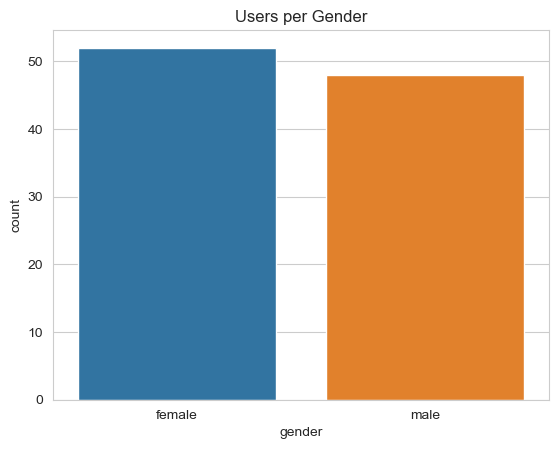

In [33]:
sns.countplot(x='gender', data=df)
plt.title("Users per Gender")
plt.show()


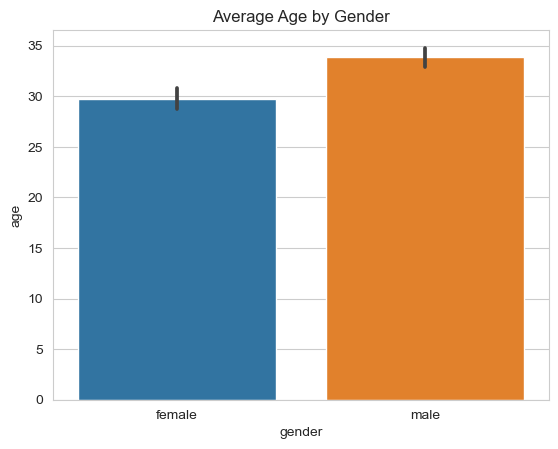

In [34]:
sns.barplot(x='gender', y='age', data=df)
plt.title("Average Age by Gender")
plt.show()


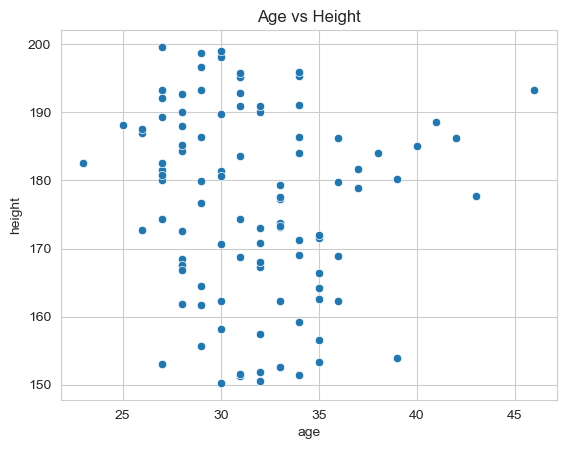

In [35]:
sns.scatterplot(x='age', y='height', data=df)
plt.title("Age vs Height")
plt.show()


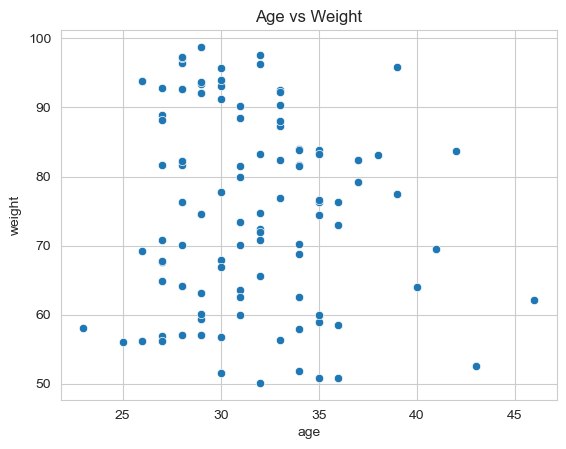

In [36]:
sns.scatterplot(x='age', y='weight', data=df)
plt.title("Age vs Weight")
plt.show()


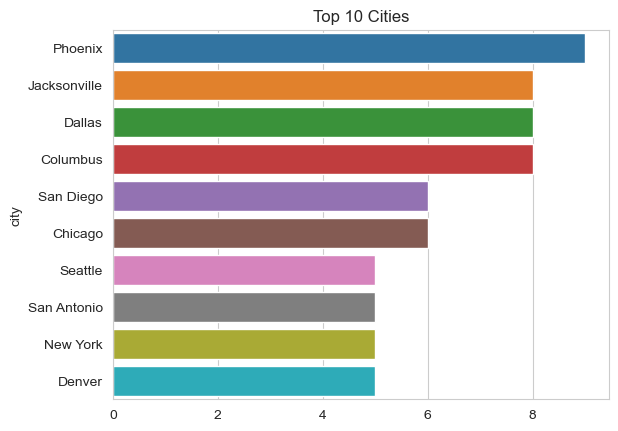

In [37]:
top_cities = df['city'].value_counts().head(10)

sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities")
plt.show()
